In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# import seaborn as sns

In [2]:
indeed_CA = pd.read_csv("indeed_CA.csv")
df_CA = pd.read_csv("df_CA.csv")

In [3]:
df_CA.head(3)

,Unnamed: 0,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Competitors,Easy Apply,City,State,SalaryEstimate_low,SalaryEstimate_high,Revenue_low,Revenue_high
0,454,Data Analyst,Ref ID: 00310-0011482030Classification: Sales ...,3.5,Robert Half\n3.5,"Reedley, CA","Menlo Park, CA",10000+ employees,1948,Company - Public,Staffing & Outsourcing,Business Services,"Adecco, Manpower",-1,Reedley,CA,47000,81000,2000000.0,5000000.0
1,455,"Data Analyst, District Office - Accountability...",About the Employer\n\n\nNestled close to the m...,3.7,TCOE\n3.7,"Visalia, CA","Springville, CA",1 to 50 employees,-1,School / School District,Preschool & Child Care,Education,-1,-1,Visalia,CA,47000,81000,1000000.0,5000000.0
2,456,Data Analyst (Kings County),The purpose of the Data Analyst in the Case In...,3.3,"Public Health Foundation Enterprises, In\n3.3","Hanford, CA","City of Industry, CA",1001 to 5000 employees,1968,Nonprofit Organization,Social Assistance,Non-Profit,-1,-1,Hanford,CA,47000,81000,50000000.0,100000000.0


In [4]:
df_CA['Location'].value_counts()

San Francisco, CA    119
Los Angeles, CA       80
San Diego, CA         62
San Jose, CA          38
Santa Clara, CA       22
                    ... 
Signal Hill, CA        1
Torrance, CA           1
Emeryville, CA         1
Campbell, CA           1
Marin City, CA         1
Name: Location, Length: 74, dtype: int64

In [5]:
df_CA['Easy Apply'].value_counts()

-1      599
True     27
Name: Easy Apply, dtype: int64

In [6]:
# Easy apply option is not available for most of the companies. It seems like it is an unnecessary column.

In [7]:
df_CA['Competitors'].value_counts()

-1                                               462
Google, Microsoft, Samsung Electronics            10
Acumen                                             5
Experis                                            5
Adecco, Manpower                                   5
                                                ... 
CyberCoders, Kforce, ASGN Incorporated             1
PRA Group                                          1
Palo Alto Networks, FireEye, Juniper Networks      1
Kforce, Insight Global, Volt Consulting Group      1
Paxata, Datameer, Informatica                      1
Name: Competitors, Length: 103, dtype: int64

In [8]:
df_CA.columns

Index(['Unnamed: 0', 'Job Title', 'Job Description', 'Rating', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Competitors', 'Easy Apply', 'City', 'State',
       'SalaryEstimate_low', 'SalaryEstimate_high', 'Revenue_low',
       'Revenue_high'],
      dtype='object')

In [9]:
for col in df_CA:
    df_CA[col]= df_CA[col].replace('-1', np.nan)
    df_CA[col]= df_CA[col].replace(-1, np.nan)

In [10]:
df_CA['SalaryEstimate_ave']=(df_CA['SalaryEstimate_low']+df_CA['SalaryEstimate_high'])/2

In [11]:
df_CA['Revenue_ave']=(df_CA['Revenue_low']+df_CA['Revenue_high'])/2

In [12]:
df_CA['Comp_Age'] = 2020 - df_CA['Founded']

In [13]:
df_CA["Comp_Age"].unique()

array([ 72.,  nan,  52.,  24.,  10.,   6.,   7.,  12.,   2.,   3.,  23.,
         4.,  20.,   9., 118.,   8.,  13.,  76., 132.,  18.,  49., 140.,
        47.,  97.,  38.,  89.,  17.,  33.,  82.,  42.,  30.,  19.,   5.,
        31.,  11.,  22.,   1., 101.,  41.,  75.,  37.,  66.,  15.,  54.,
        40.,  14., 109.,  59.,  26.,  81.,  44.,  25.,  85., 148.,  43.,
        94.,  56.,  29., 165.,  21.,  61.,  58.,  67.,  60., 152.,  16.,
        68., 123.,  74.,  36.,  35.,  34.,  27.,  32.,  28.,  48., 129.,
       213.,  63., 114.,  96., 113., 156.,  39., 146., 338.,  73., 168.])

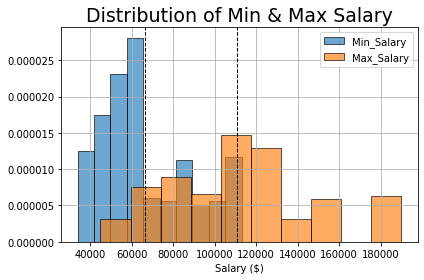

In [32]:
# Salary Histogram

df_CA['SalaryEstimate_low'].hist(density=1, label = "Min_Salary", edgecolor='k', alpha=0.65)
df_CA['SalaryEstimate_high'].hist(density=1, label = "Max_Salary", edgecolor='k', alpha=0.65)

plt.xlabel("Salary ($)")
plt.legend({'Min_Salary':df_CA['SalaryEstimate_low'],'Max_Salary':df_CA['SalaryEstimate_high']})
plt.title("Distribution of Min & Max Salary",fontsize=19)

plt.axvline(df_CA['SalaryEstimate_low'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df_CA['SalaryEstimate_high'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.tight_layout()
plt.savefig("salaryhist.png")
plt.show()


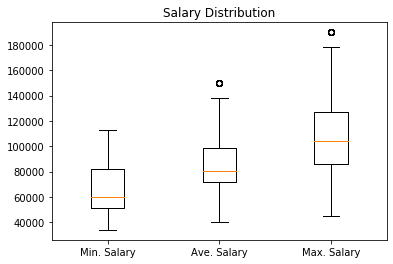

In [31]:

plt.boxplot([df_CA['SalaryEstimate_low'],df_CA['SalaryEstimate_ave'],df_CA['SalaryEstimate_high']], labels=['Min. Salary', 'Ave. Salary', 'Max. Salary'])

plt.title('Salary Distribution')
plt.savefig("salarybox.png")
plt.show()


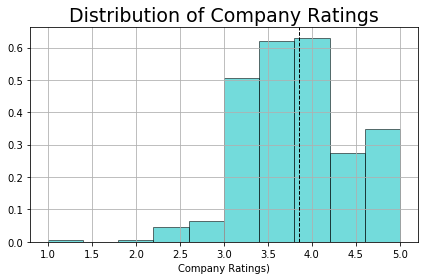

In [30]:
# Company Ratings Histogram

df_CA['Rating'].hist(density=1, label = "Min_Salary",color='c', edgecolor='k', alpha=0.55)

plt.xlabel("Company Ratings)")
plt.title("Distribution of Company Ratings",fontsize=19)

plt.axvline(df_CA['Rating'].mean(), color='k', linestyle='dashed', linewidth=1)


plt.tight_layout()
plt.savefig("rating.png")
plt.show()


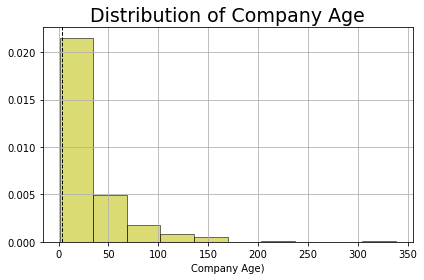

In [29]:
# Company Age Histogram

df_CA['Comp_Age'].hist(density=1, label = "Min_Salary",color='y', edgecolor='k', alpha=0.55)

plt.xlabel("Company Age)")
plt.title("Distribution of Company Age",fontsize=19)

plt.axvline(df_CA['Rating'].mean(), color='k', linestyle='dashed', linewidth=1)


plt.tight_layout()
plt.savefig("age.png")
plt.show()




In [23]:
# Job Locations vs Hiring

Location_count = df_CA.groupby('Location')[['Job Title']].count().reset_index().sort_values(
    'Job Title', ascending=False).reset_index(drop=True)

In [24]:
Location_count

,Location,Job Title
0,"San Francisco, CA",119
1,"Los Angeles, CA",80
2,"San Diego, CA",62
3,"San Jose, CA",38
4,"Santa Clara, CA",22
...,...,...
69,"Monterey Park, CA",1
70,"National City, CA",1
71,"Novato, CA",1
72,"Panorama City, CA",1


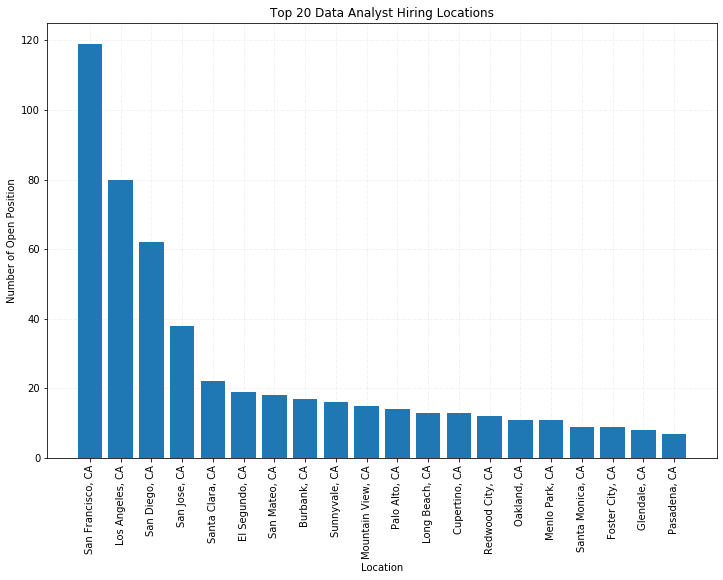

In [25]:
x = Location_count['Location'].head(20)
y = Location_count['Job Title'].head(20)
fig, ax = plt.subplots(figsize =(12, 8))   
ax.bar(x, y) 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
plt.xticks(rotation=90)
plt.xlabel("Location") 
plt.ylabel("Number of Open Position") 
plt.title("Top 20 Data Analyst Hiring Locations") 
plt.show() 
fig.savefig('hiring.png', dpi=fig.dpi)